
<h1 align=left><font size = 5>Exploratory Data Analysis Report</font></h1>

Capstone Project: Insurance Company Benchmark

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya 

Dataset: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data
Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29


 Import libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas-profiling
import pandas_profiling


load data and store in dataframe InsData_ori:

In [4]:
df_ori = pd.read_csv("/ticdata2000.txt",  delimiter = "\t",header=None)
df_ori.head()



0   1   2   3   4   5   6   7   8   9   ...  76  77  78  79  80  81  82  \
0  33   1   3   2   8   0   5   1   3   7  ...   0   0   0   1   0   0   0   
1  37   1   2   2   8   1   4   1   4   6  ...   0   0   0   1   0   0   0   
2  37   1   2   2   8   0   4   2   4   3  ...   0   0   0   1   0   0   0   
3   9   1   3   3   3   2   3   2   4   5  ...   0   0   0   1   0   0   0   
4  40   1   4   2  10   1   4   1   4   7  ...   0   0   0   1   0   0   0   

   83  84  85  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 86 columns]

In [5]:
# add column headings
# column names from the data dictionary
#df_ori.columns=['MOSTYPE',	'MAANTHUI',	'MGEMOMV',	'MGEMLEEF',	'MOSHOOFD',	'MGODRK',	'MGODPR',	'MGODOV',	'MGODGE',	'MRELGE',	'MRELSA',	'MRELOV',	'MFALLEEN',	'MFGEKIND',	'MFWEKIND',	'MOPLHOOG',	'MOPLMIDD',	'MOPLLAAG',	'MBERHOOG',	'MBERZELF',	'MBERBOER',	'MBERMIDD',	'MBERARBG',	'MBERARBO',	'MSKA',	'MSKB1',	'MSKB2',	'MSKC',	'MSKD',	'MHHUUR',	'MHKOOP',	'MAUT1',	'MAUT2',	'MAUT0',	'MZFONDS',	'MZPART',	'MINKM30',	'MINK3045',	'MINK4575',	'MINK7512',	'MINK123M',	'MINKGEM',	'MKOOPKLA',	'PWAPART',	'PWABEDR',	'PWALAND',	'PPERSAUT',	'PBESAUT',	'PMOTSCO',	'PVRAAUT',	'PAANHANG',	'PTRACTOR',	'PWERKT',	'PBROM',	'PLEVEN',	'PPERSONG',	'PGEZONG',	'PWAOREG',	'PBRAND',	'PZEILPL',	'PPLEZIER',	'PFIETS',	'PINBOED',	'PBYSTAND',	'AWAPART',	'AWABEDR',	'AWALAND',	'APERSAUT',	'ABESAUT',	'AMOTSCO',	'AVRAAUT',	'AAANHANG',	'ATRACTOR',	'AWERKT',	'ABROM',	'ALEVEN',	'APERSONG',	'AGEZONG',	'AWAOREG',	'ABRAND',	'AZEILPL',	'APLEZIER',	'AFIETS',	'AINBOED',	'ABYSTAND',	'CARAVAN']
# English coulmn names for ease of reference. 1 - 43 are demographic varaibles (column name with prefix sd_), values based on zip code.
#44-86 are product ownership of insurance customers (column name with prefix po_).  target varaible : po_ins_pol_caravan
#df_ori.columns=['cust_subtype',	'no_of_houses',	'avg_household',	'avg_age_band',	'cust_maintype',	'religion_catholic',	'religion_protestant',	'religion_other',	'religion_no',	'rel_married',	'rel_living_tg',	'rel_other',	'rel_no_singles',	'hshold_wo_children',	'hshold_w_children',	'education_higher',	'education_medium',	'education_lower',	'empst_high',	'empst_Entrepr ',	'empst_farmer',	'empst_mdl_mgmt',	'empst_skill_labour',	'empst_unskill_labour',	'socialclassA',	'socialclassB1',	'socialclassB2',	'socialclassC',	'socialclassD',	'rentedhouse',	'homeowners',	'car_1',	'car_2',	'car_0',	'health_ins_national',	'health_ins_private',	'income_l_30k',	'income_30k_45k',	'income_45k_75k',	'income_75k_122k',	'income_g_123k',	'income_avg',	'p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_thirdparty_firms',	'ins_pol_thirdparty_agri',	'ins_pol_car',	'ins_pol_del_van',	'ins_pol_motorcycle_sc',	'ins_pol_lorry',	'ins_pol_trailer',	'ins_pol_tractor',	'ins_pol_agri_machines',	'ins_pol_moped',	'ins_pol_life',	'ins_pol_accident_ins_pvt',	'ins_pol_accident_ins_fam',	'ins_pol_disability',	'ins_pol_fire',	'ins_pol_surfboard',	'ins_pol_boat',	'ins_pol_bicycle',	'ins_pol_property',	'ins_pol_social security',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_thirdparty_firms',	'no_ins_pol_thirdparty_agri',	'no_ins_pol_car',	'no_ins_pol_del_van',	'no_ins_pol_motorcycle_sc',	'no_ins_pol_lorry',	'no_ins_pol_trailer',	'no_ins_pol_tractor',	'no_ins_pol_agri_machines',	'no_ins_pol_moped',	'no_ins_pol_life',	'no_ins_pol_accident_ins_pvt',	'no_ins_pol_accident_ins_fam',	'no_ins_pol_disability',	'no_ins_pol_fire',	'no_ins_pol_surfboard',	'no_ins_pol_boat',	'no_ins_pol_bicycle',	'no_ins_pol_property',	'no_ins_pol_social security',	'no_ins_pol_caravan']
df_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr ' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,	'po_ins_pol_caravan']

df_ori


sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0                  33                1                 3                2   
1                  37                1                 2                2   
2                  37                1                 2                2   
3                   9                1                 3                3   
4                  40                1                 4                2   
...               ...              ...               ...              ...   
5817               36                1                 1                2   
5818               35                1                 4                4   
5819               33                1                 3                4   
5820               34                1                 3                2   
5821               33                1                 3                3   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0                    8                     0                       5   
1                    8                     1                       4   
2                    8                     0                       4   
3                    3                     2                       3   
4                   10                     1                       4   
...                ...                   ...                     ...   
5817                 8                     0                       6   
5818                 8                     1                       4   
5819                 8                     0                       6   
5820                 8                     0                       7   
5821                 8                     0                       6   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                     1               3               7  ...   
1                     1               4               6  ...   
2                     2               4               3  ...   
3                     2               4               5  ...   
4                     1               4               7  ...   
...                 ...             ...             ...  ...   
5817                  1               2               1  ...   
5818                  1               4               6  ...   
5819                  0               3               5  ...   
5820                  0               2               7  ...   
5821                  1               2               7  ...   

      po_no_ins_pol_accident_ins_pvt  po_no_ins_pol_accident_ins_fam  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   
...                              ...                             ...   
5817                               0                               0   
5818                               0                               0   
5819                               0                               0   
5820                               0                               0   
5821                               0                               0   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
0                            0                   1                        0   
1                            0                   1                        0   
2                            0                   1                        0   
3                            0                   1                        0   
4                            0                   1                        0   
...                        ...                 ...                      ...   
5817                         

In [ ]:
print('no of records and columns ',df_ori.shape)
# list the data types for each column
df_ori.dtypes

no of records and columns  (5822, 86)


sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
po_ins_pol_caravan               int64
Length: 86, dtype: object

In [ ]:
df_x=df_ori.iloc[:,0:8]
df_x.dtypes

sd_cust_subtype           int64
sd_no_of_houses           int64
sd_avg_household          int64
sd_avg_age_band           int64
sd_cust_maintype          int64
sd_religion_catholic      int64
sd_religion_protestant    int64
sd_religion_other         int64
dtype: object

In [ ]:
#  Get Exploratory data analysis report.
!pip install pandas-profiling
import pandas_profiling

In [ ]:
# full profile report
profile = df_ori.profile_report(title='Pandas Profiling Report - Complete report')
profile.to_file(output_file="Pandas Profiling Report - complete report — Insurance Benchmark .html")

In [ ]:
# since the dataframe is too large, we produce profile report to view variable report. (corelation report will be generated separatly)
profile1 = df_ori.profile_report(title='Pandas Profiling Report',  minimal=True)
profile1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile1.to_file(output_file="Pandas Profiling Report — Variable profile1 .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [6]:
# drop duplicate rows
print("original file ", df_ori.shape)
df_2 = df_ori.drop_duplicates()
print("file after removing duplicate records  ", df_2.shape)

original file  (5822, 86)
file after removing duplicate records   (5220, 86)


602 duplicate records were removed.

In [ ]:
# checking variable distribution after removing duplicates.
profile2 = df_2.profile_report(title='Pandas Profiling Report',  minimal=True)
profile2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile2.to_file(output_file="Pandas Profiling Report — Variable profile2 - no duplicates .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# distribution of target variable
df_2.po_ins_pol_caravan.value_counts()

0    4880
1     340
Name: po_ins_pol_caravan, dtype: int64

# Data Wrangling


Look at Caravan customers by zip code

since the sociodemographic data  variables are based on postal code, Here we are tryong to identify records from same postal code and give an arbitrary zipcode no.
This is to analyse variables by location, to find patterns in data.

In [ ]:
# separate sociodemographic variables
df_sd = df_2[df_2.columns[pd.Series(df_2.columns).str.startswith('sd_')]]
columns = df_sd.columns.tolist()
df_2['sd_combined'] = df_2.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)
# sort by combined
df_2=df_2.sort_values([ 'sd_combined'])

<ipython-input-7-1446acce5c00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sd_combined'] = df_2.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)


In [ ]:
# create one column id_zipcode concaternating all sociodemographic  data.
df_2['id_zipcode'] = df_2.groupby('sd_combined', sort=False).ngroup() + 1
df_2.head(10)

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
1536               10                1                 2                3   
4597               10                1                 2                3   
5723               10                1                 3                2   
261                10                1                 3                2   
3958               10                1                 3                2   
340                10                1                 3                2   
2527               10                1                 3                2   
3776               10                1                 3                2   
3783               10                1                 3                2   
4442               10                1                 3                2   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
1536                 3                     2                       1   
4597                 3                     2                       1   
5723                 3                     0                       4   
261                  3                     0                       4   
3958                 3                     0                       4   
340                  3                     0                       5   
2527                 3                     0                       5   
3776                 3                     0                       5   
3783                 3                     0                       5   
4442                 3                     0                       6   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
1536                  0               6               6  ...   
4597                  1               6               6  ...   
5723                  2               4               9  ...   
261                   2               4               9  ...   
3958                  2               4               9  ...   
340                   0               4               7  ...   
2527                  0               4               7  ...   
3776                  0               4               7  ...   
3783                  3               2               4  ...   
4442                  2               1               7  ...   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
1536                         0                   1                        0   
4597                         0                   1                        0   
5723                         0                   0                        0   
261                          0                   0                        0   
3958                         0                   1                        0   
340                          0                   1                        0   
2527                         0                   0                        0   
3776                         0                   0                        0   
3783                         0                   0                        0   
4442                         0                   1                        0   

      po_no_ins_pol_boat  po_no_ins_pol_bicycle  po_no_ins_pol_property  \
1536                   0                      0                       0   
4597                   0                      0                       0   
5723                   0                      0                       0   
261                    0                      1                       0   
3958                   0                      0                       0   
340                    0                      0                       0   
2527                   0                      0                       0   
3776                   0                      1                       0   
3783                   0                      0                       1   
4442                   0                

In [ ]:
# checking one sample
dd=df_2[df_2['id_zipcode'] == 1730]
dd[['sd_combined', 'id_zipcode']]

sd_combined  id_zipcode
1585  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
5126  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
5124  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
470   9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
181   9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
1254  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730

In [ ]:
df_2_carv_1.drop_duplicates()
print("record count w caravan", df_2_carv_1.shape)

record count w caravan (340, 1)


In [ ]:
df_2_carv_1

id_zipcode
1268           9
226           23
2666          27
3103          34
4616          37
...          ...
4945        1710
3476        1715
1005        1718
1557        1721
1118        1722

[340 rows x 1 columns]

In [ ]:
df_2_carv_1

po_ins_pol_caravan  id_zipcode  caravan_1
1268                   1           9          1
226                    1          23          1
2666                   1          27          1
3103                   1          34          1
4616                   1          37          1
...                  ...         ...        ...
4945                   1        1710          1
3476                   1        1715          1
1005                   1        1718          1
1557                   1        1721          1
1118                   1        1722          1

[340 rows x 3 columns]

**Question** : How does Caravan Insurance ownership vary across different demographic areas?

record count (340, 2)
summary2 
 po_ins_pol_caravan
1    248
2     34
3      4
4      3
Name: po_ins_pol_caravan, dtype: int64




<Axes: title={'center': 'Locations with more than one Caravan customers '}, xlabel='id_zipcode'>

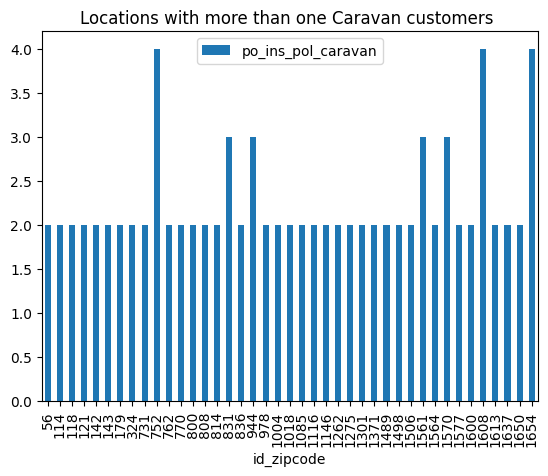

In [ ]:
# Distribution of caravan policies by zipcode
#records of caravan policies
df_2_carv = df_2[df_2['po_ins_pol_caravan'] ==1][['po_ins_pol_caravan', 'id_zipcode']]
print("record count", df_2_carv.shape)
#df_2_carv.head(10)
plt.close("all")
summary1=df_2_carv.groupby(['id_zipcode']).count()
summary2=summary1.groupby(['po_ins_pol_caravan'])['po_ins_pol_caravan'].count()
print('summary2 \n', summary2)
print('\n')
summary3=df_2_carv.groupby(['id_zipcode']).filter(lambda x: x['po_ins_pol_caravan'].sum() > 1)
summary3.groupby(['id_zipcode']).count().plot(kind='bar', y='po_ins_pol_caravan', title="Locations with more than one Caravan customers ")
#summary2.plot(kind='bar', y='po_ins_pol_caravan')




What are social charactoristics of customers from areas with more than one poicy?

In [ ]:
# checking profile of caravan policies , target = 1 (348 records)
df_2_carv2 = df_2[df_2['po_ins_pol_caravan'] ==1]
df_2_carv3 = df_2_carv2[df_2.columns[pd.Series(df_2.columns).str.startswith('po_')]]
profile3 = df_2_carv3.profile_report(title='Pandas Profiling Report3',  minimal=True)
profile3

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile3.to_file(output_file="Pandas Profiling Report — Variable profile3 - caravan policies .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

These varaibles have no contribution for caravan policies.

po_ins_pol_agri_machines,po_ins_pol_lorry,po_no_ins_pol_agri_machines, po_no_ins_pol_lorry

In [ ]:
# we will drop these varaibles
df_3=df_2.drop(['po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'],axis=1)
df_3.shape

(5220, 84)

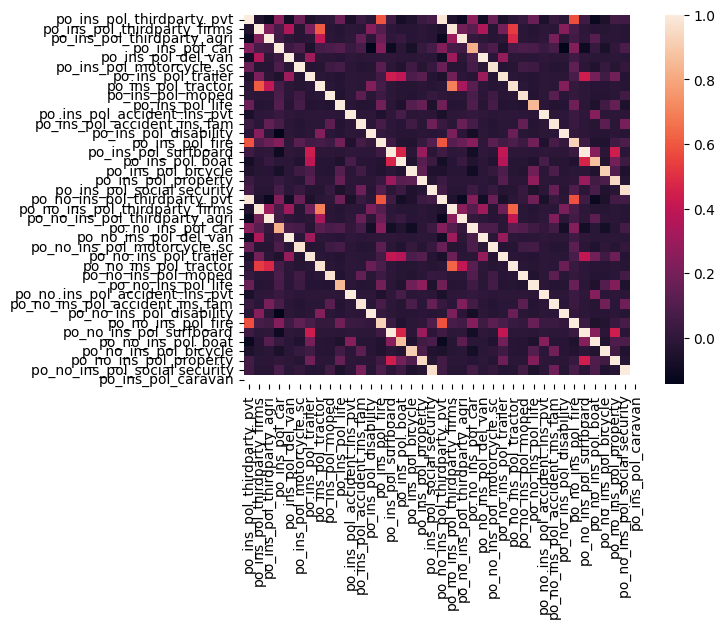

In [ ]:
# checking corelation of product varibles of caravan customers. (target = 1)
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3 = df_3_carv2[df_3.columns[pd.Series(df_3.columns).str.startswith('po_')]]

corr1 = df_3_carv3.corr()
sns.heatmap(corr1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_1_caravan_product_columns.png", dpi=300)

In [ ]:

print(df_3.po_ins_pol_property.value_counts())


0    5175
1      18
2      16
3       6
4       3
5       1
6       1
Name: po_ins_pol_property, dtype: int64


# can we create distinct profiles of Caravan Insurance customers based on sociodemographic data?

Customers of Caravan policy

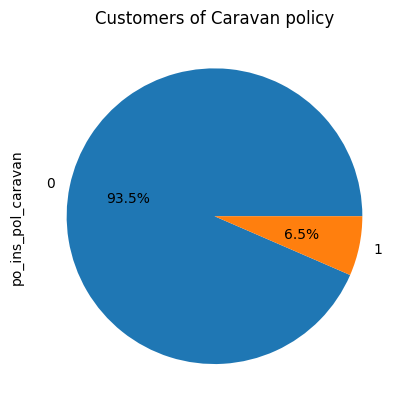

In [ ]:
summary5=df_3.po_ins_pol_caravan.value_counts()
summary5
summary5.plot.pie(autopct="%.1f%%",title="Customers of Caravan policy");


In [ ]:
summary5=df_3.po_ins_pol_caravan.value_counts()
summary5

0    4880
1     340
Name: po_ins_pol_caravan, dtype: int64

Text(0.5, 0, 'Number of Customers')

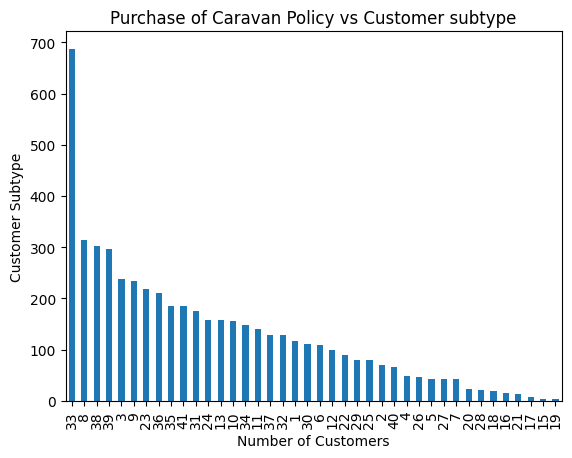

In [ ]:
summary6=df_3.sd_cust_subtype.value_counts()
summary6.plot(kind="bar")
plt.title("Purchase of Caravan Policy vs Customer subtype")
plt.ylabel("Customer Subtype")
plt.xlabel("Number of Customers")


Customer subtype description

33	Lower class large families

8	Middle class families

38	Traditional families

39	Large religous families


Text(0.5, 0, 'Number of Customers')

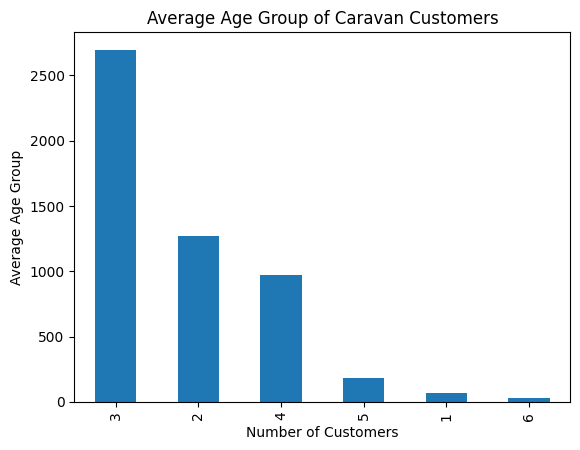

In [ ]:
summary7=df_3.sd_avg_age_band.value_counts()
summary7.plot(kind="bar")
plt.title("Average Age Group of Caravan Customers")
plt.ylabel("Average Age Group")
plt.xlabel("Number of Customers")


average age group bands

1 20-30 years

2 30-40 years

3 40-50 years

4 50-60 years

5 60-70 years

6 70-80 years

In [ ]:
# scatter plots
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1] # selecting caravan policies
df_3_carv4=df_3_carv2.iloc[:,0:43]


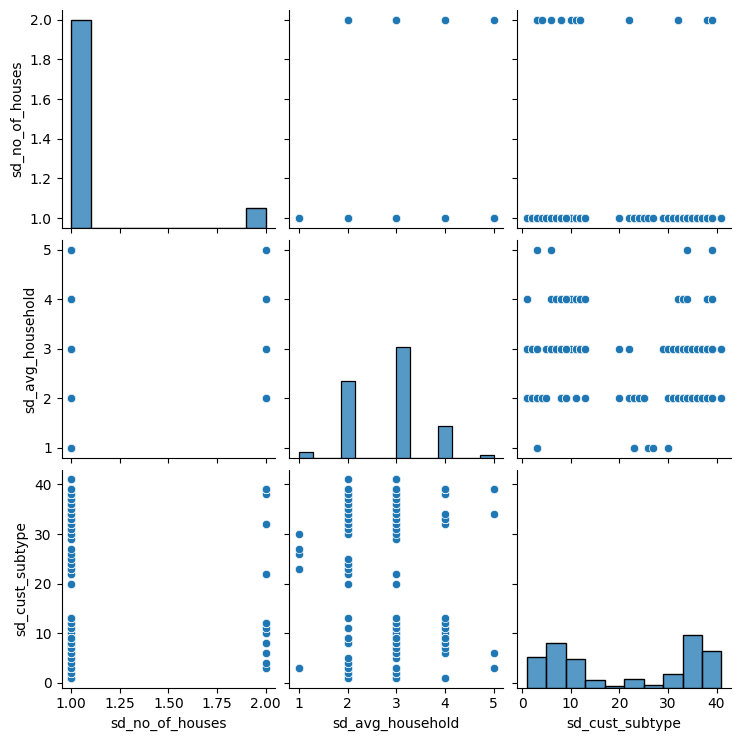

In [ ]:
g = sns.pairplot(df_3_carv4, vars=['sd_no_of_houses', 'sd_avg_household', 'sd_cust_subtype'])




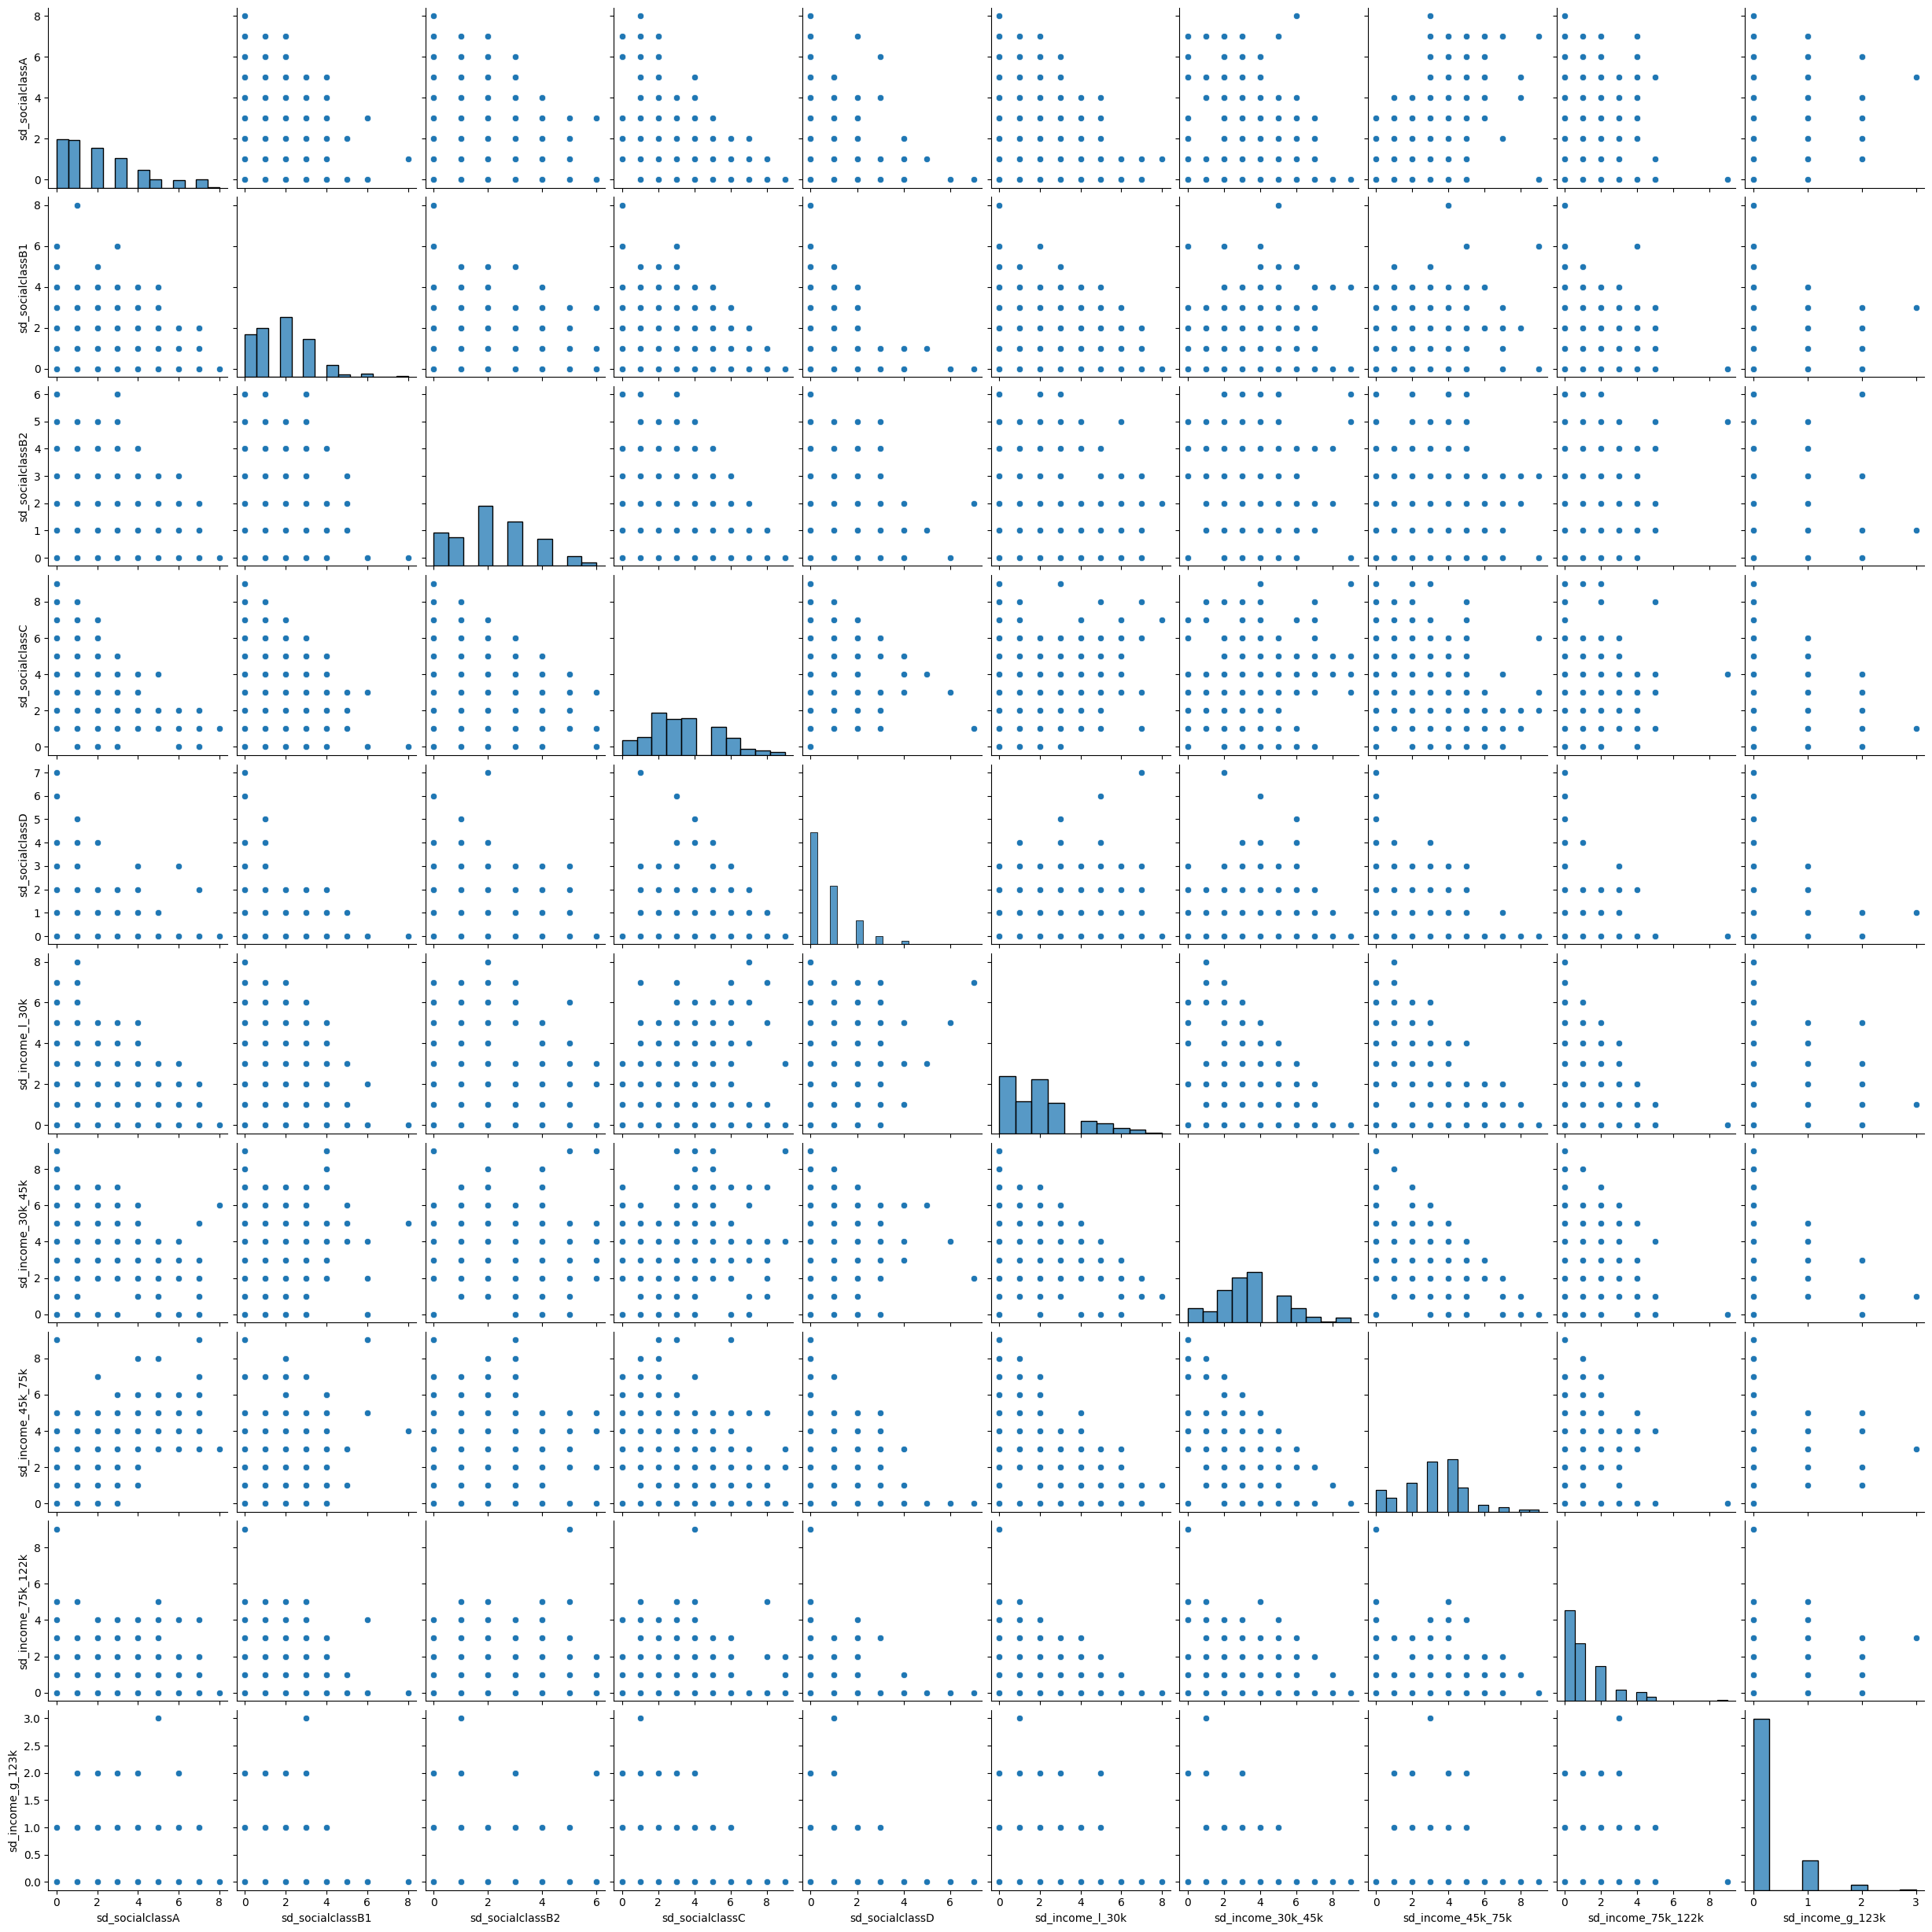

In [ ]:
g = sns.pairplot(df_3_carv4, vars=[ 'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ])



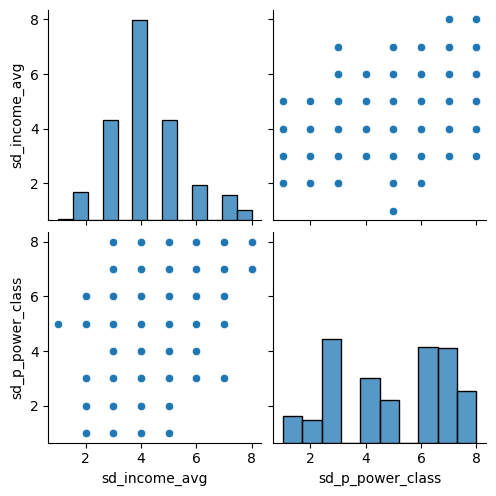

In [ ]:
g = sns.pairplot(df_3_carv4, vars=[ 'sd_income_avg', 'sd_p_power_class'])

In [ ]:
df_3_carv4.dtypes

sd_cust_subtype            int64
sd_no_of_houses            int64
sd_avg_household           int64
sd_avg_age_band            int64
sd_cust_maintype           int64
sd_religion_catholic       int64
sd_religion_protestant     int64
sd_religion_other          int64
sd_religion_no             int64
sd_rel_married             int64
sd_rel_living_tg           int64
sd_rel_other               int64
sd_rel_no_singles          int64
sd_hshold_wo_children      int64
sd_hshold_w_children       int64
sd_education_higher        int64
sd_education_medium        int64
sd_education_lower         int64
sd_empst_high              int64
sd_empst_Entrepr           int64
sd_empst_farmer            int64
sd_empst_mdl_mgmt          int64
sd_empst_skill_labour      int64
sd_empst_unskill_labour    int64
sd_socialclassA            int64
sd_socialclassB1           int64
sd_socialclassB2           int64
sd_socialclassC            int64
sd_socialclassD            int64
sd_rentedhouse             int64
sd_homeown

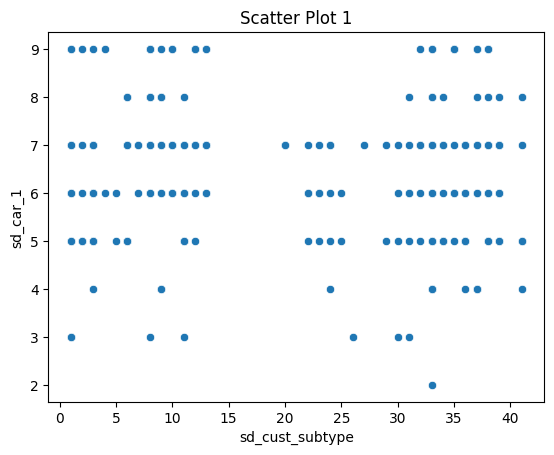

In [ ]:
# Plotting Scatter Plots
sns.scatterplot(x='sd_cust_subtype', y='sd_car_1', data=df_3_carv4)
plt.title("Scatter Plot 1")
plt.show()

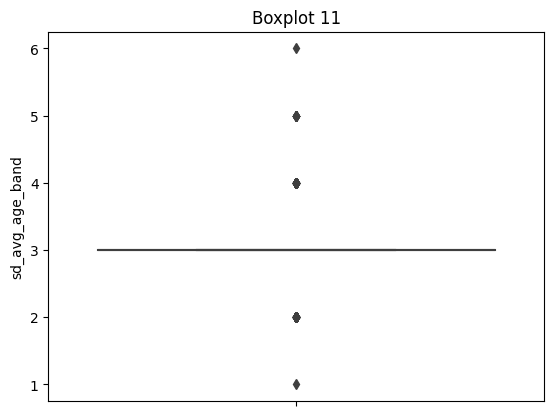

In [ ]:
sns.boxplot(y='sd_avg_age_band', data = df_3_carv4)
#sns.boxplot('alcohol', data = df)
plt.title("Boxplot 11")
plt.show()

<ipython-input-26-5a57ff1331d0>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])


IndexError: ignored

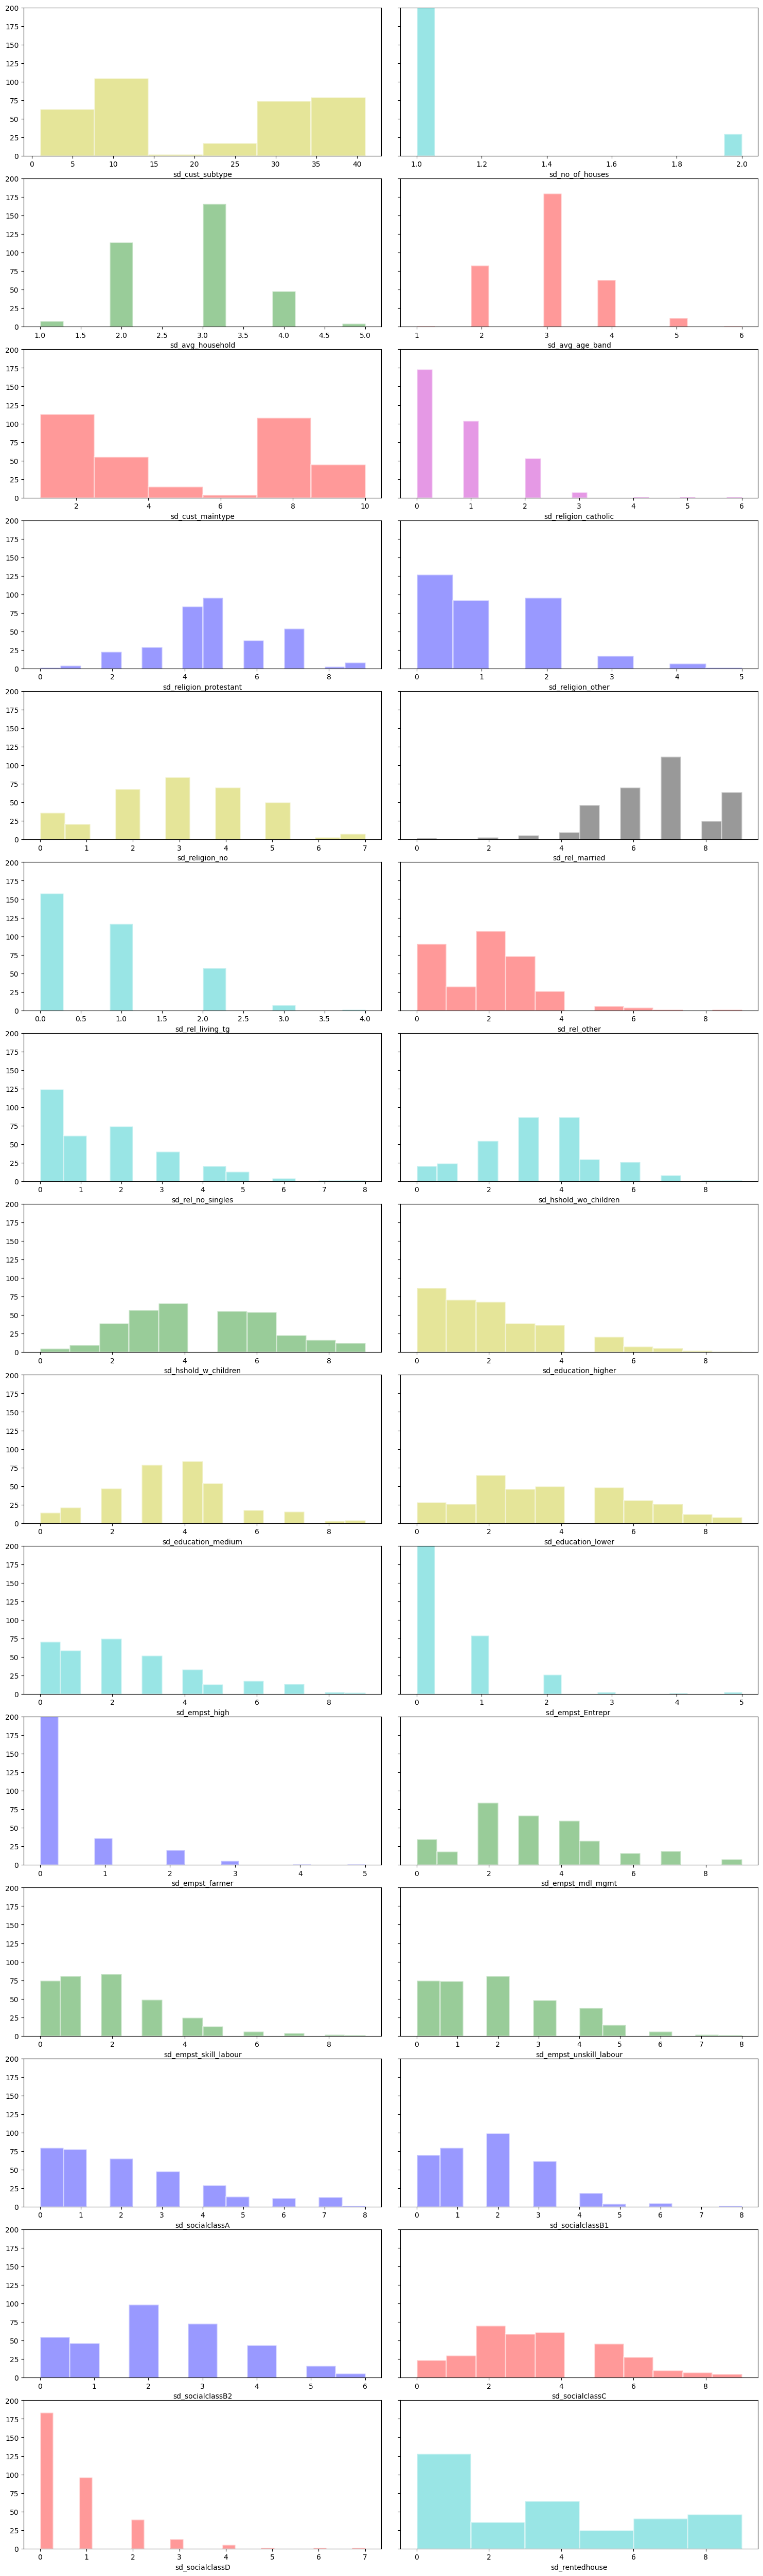

In [ ]:
df = df_3_carv4
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =15,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(df.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(df[df.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)

Examining a customer's likelihood to purchase Caravan Insurance based on their sociodemographic characteristics

In [ ]:
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3 = df_3_carv2[df_3.columns[pd.Series(df_3.columns).str.startswith('sd_')]]
df_3_carv3.shape

(340, 44)

<ipython-input-53-86670f50790e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df_3_carv3sd.corr()


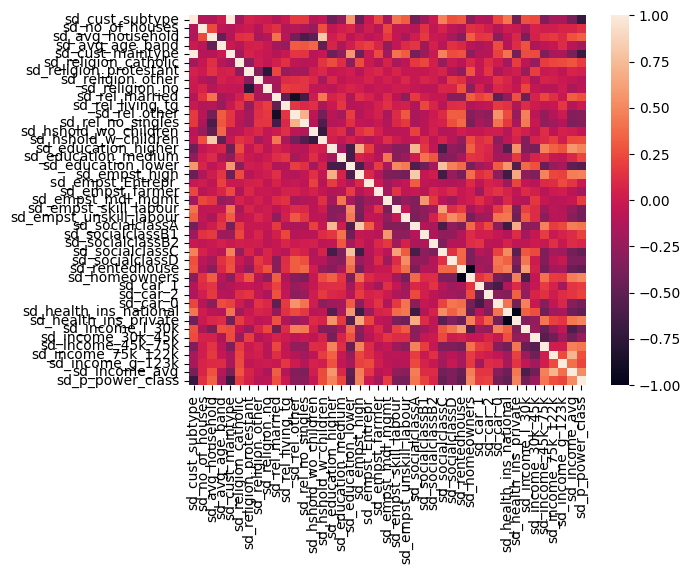

In [ ]:
df_3_carv2sd = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3sd = df_3_carv2sd[df_3.columns[pd.Series(df_3.columns).str.startswith('sd_')]]

corr2 = df_3_carv3sd.corr()
sns.heatmap(corr2, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values)
plt.savefig("corr_matrix_2_caravan_socialdemographic_columns.png", dpi=300)

In [ ]:
df = pd.DataFrame({'team': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C'],
                   'position': ['G', 'F', 'F', 'G', 'F', 'F', 'G', 'G'],
                   'points': [30, 22, 19, 14, 14, 11, 20, 28]})
df.groupby('team').filter(lambda x: len(x) > 2)

team position  points
0    A        G      30
1    A        F      22
2    A        F      19
3    B        G      14
4    B        F      14
5    B        F      11

module://matplotlib_inline.backend_inline


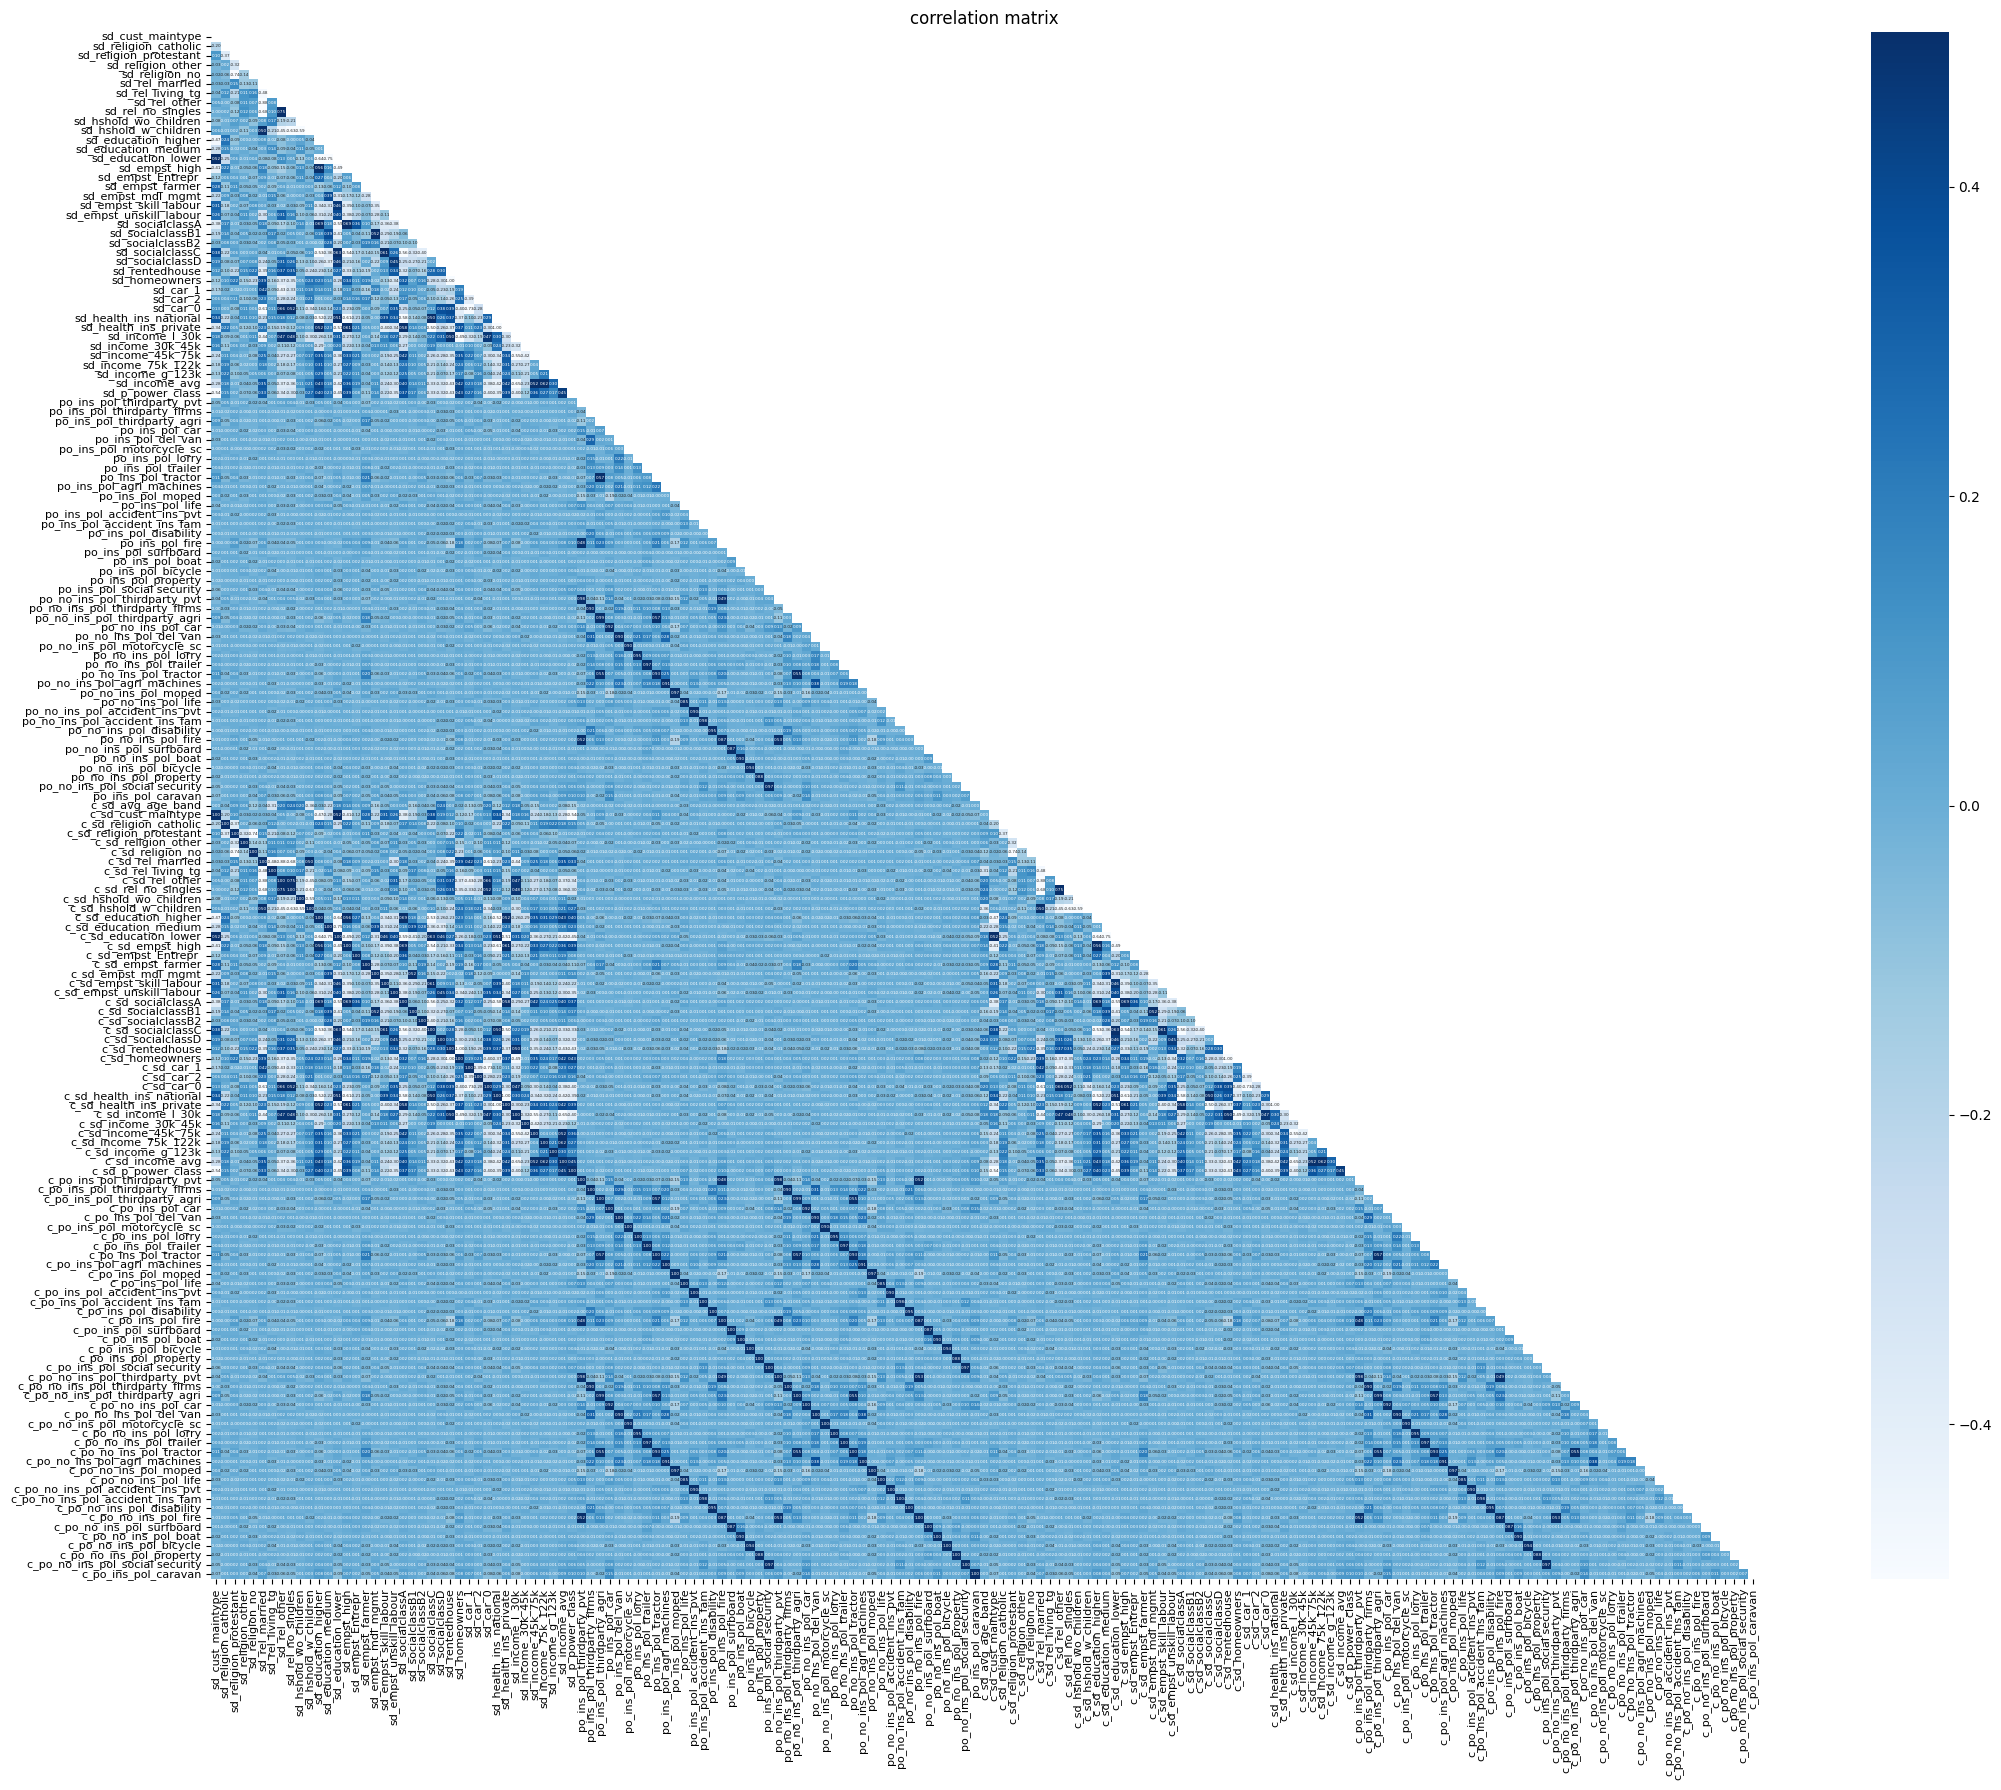

In [ ]:
# print correlation matrix
print(plt.get_backend())

# close any existing plots
plt.close("all")

df = df_ori
# select out the desired columns
df = df.iloc[:, 3:].select_dtypes(include=['float64','int64'])

# copy columns to double size of dataframe
df2 = df.copy()
df2.columns = "c_" + df2.columns
df3 = pd.concat([df, df2], axis=1)

# get the correlation coefficient between the different columns
corr = df3.iloc[:, 1:].corr(method='pearson')
#arr_corr = corr.as_matrix()
arr_corr = corr.to_numpy()
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [ ]:
# Create correlation matrix
corr_matrix = df_ori.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['sd_cust_maintype',
 'sd_religion_no',
 'sd_rel_other',
 'sd_rel_no_singles',
 'sd_hshold_w_children',
 'sd_education_lower',
 'sd_socialclassA',
 'sd_socialclassC',
 'sd_homeowners',
 'sd_car_0',
 'sd_health_ins_national',
 'sd_health_ins_private',
 'sd_income_avg',
 'po_no_ins_pol_thirdparty_pvt',
 'po_no_ins_pol_thirdparty_firms',
 'po_no_ins_pol_thirdparty_agri',
 'po_no_ins_pol_car',
 'po_no_ins_pol_del_van',
 'po_no_ins_pol_motorcycle_sc',
 'po_no_ins_pol_lorry',
 'po_no_ins_pol_trailer',
 'po_no_ins_pol_tractor',
 'po_no_ins_pol_agri_machines',
 'po_no_ins_pol_moped',
 'po_no_ins_pol_life',
 'po_no_ins_pol_accident_ins_pvt',
 'po_no_ins_pol_accident_ins_fam',
 'po_no_ins_pol_disability',
 'po_no_ins_pol_fire',
 'po_no_ins_pol_surfboard',
 'po_no_ins_pol_boat',
 'po_no_ins_pol_bicycle',
 'po_no_ins_pol_property',
 'po_no_ins_pol_social security']

In [ ]:
upper

sd_cust_subtype  sd_no_of_houses  \
sd_cust_subtype                            NaN         0.038721   
sd_no_of_houses                            NaN              NaN   
sd_avg_household                           NaN              NaN   
sd_avg_age_band                            NaN              NaN   
sd_cust_maintype                           NaN              NaN   
...                                        ...              ...   
po_no_ins_pol_boat                         NaN              NaN   
po_no_ins_pol_bicycle                      NaN              NaN   
po_no_ins_pol_property                     NaN              NaN   
po_no_ins_pol_social security              NaN              NaN   
po_ins_pol_caravan                         NaN              NaN   

                               sd_avg_household  sd_avg_age_band  \
sd_cust_subtype                        0.021997         0.009454   
sd_no_of_houses                        0.010102         0.056975   
sd_avg_household                            NaN         0.328257   
sd_avg_age_band                             NaN              NaN   
sd_cust_maintype                            NaN              NaN   
...                                         ...              ...   
po_no_ins_pol_boat                          NaN              NaN   
po_no_ins_pol_bicycle                       NaN              NaN   
po_no_ins_pol_property                      NaN              NaN   
po_no_ins_pol_social security               NaN              NaN   
po_ins_pol_caravan                          NaN              NaN   

                               sd_cust_maintype  sd_religion_catholic  \
sd_cust_subtype                        0.992672              0.193613   
sd_no_of_houses                        0.045817              0.006136   
sd_avg_household                       0.016115              0.013105   
sd_avg_age_band                        0.003872              0.037519   
sd_cust_maintype                            NaN              0.199186   
...                                         ...                   ...   
po_no_ins_pol_boat                          NaN                   NaN   
po_no_ins_pol_bicycle                       NaN                   NaN   
po_no_ins_pol_property                      NaN                   NaN   
po_no_ins_pol_social security               NaN                   NaN   
po_ins_pol_caravan                          NaN                   NaN   

                               sd_religion_protestant  sd_religion_other  \
sd_cust_subtype                              0.090399           0.025642   
sd_no_of_houses                              0.024360           0.012056   
sd_avg_household                             0.049356           0.108650   
sd_avg_age_band                              0.093654           0.057737   
sd_cust_maintype                             0.098493           0.034566   
...                                               ...                ...   
po_no_ins_pol_boat                                NaN                NaN   
po_no_ins_pol_bicycle                             NaN                NaN   
po_no_ins_pol_property                            NaN                NaN   
po_no_ins_pol_social security                     NaN                NaN   
po_ins_pol_caravan                                NaN                NaN   

                               sd_religion_no  sd_rel_married  ...  \
sd_cust_subtype                      0.019505        0.065596  ...   
sd_no_of_houses                      0.020540        0.023025  ...   
sd_avg_household                     0.005527        0.534798  ...   
sd_avg_age_band                      0.119966        0.040384  ...   
sd_cust_maintype                     0.021466        0.026619  ...   
...                                       ...             ...  ...   
po_no_ins_pol_boat                        NaN             NaN  ...   
po_no_ins_pol_bicycle                     NaN             N

In [ ]:
# 

In [ ]:
to_drop

[]

<Figure size 640x480 with 0 Axes>

In [ ]:
corr = df3.iloc[:, 1:].corr()
corr.to_numpy()

array([[ 1.        , -0.1991862 ,  0.09849256, ..., -0.02099701,
        -0.05172314, -0.06929983],
       [-0.1991862 ,  1.        , -0.37276739, ..., -0.01143091,
        -0.00400878,  0.00622542],
       [ 0.09849256, -0.37276739,  1.        , ...,  0.00239183,
         0.01665787,  0.03286633],
       ...,
       [-0.02099701, -0.01143091,  0.00239183, ...,  1.        ,
         0.02127317,  0.01802558],
       [-0.05172314, -0.00400878,  0.01665787, ...,  0.02127317,
         1.        ,  0.06665785],
       [-0.06929983,  0.00622542,  0.03286633, ...,  0.01802558,
         0.06665785,  1.        ]])

In [ ]:
data.head()

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0               33                1                 3                2   
1               37                1                 2                2   
2               37                1                 2                2   
3                9                1                 3                3   
4               40                1                 4                2   

   sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0                 8                     0                       5   
1                 8                     1                       4   
2                 8                     0                       4   
3                 3                     2                       3   
4                10                     1                       4   

   sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                  1               3               7  ...   
1                  1               4               6  ...   
2                  2               4               3  ...   
3                  2               4               5  ...   
4                  1               4               7  ...   

   sd_education_higher  sd_education_medium  sd_no_of_houses  sd_empst_high  \
0                    1                    2                1              1   
1                    0                    5                1              0   
2                    0                    5                1              0   
3                    3                    4                1              4   
4                    5                    4                1              0   

   sd_empst_Entrepr   sd_empst_farmer  sd_empst_mdl_mgmt  \
0                  0                1                  2   
1                  0                0                  5   
2                  0                0                  7   
3                  0                0                  3   
4                  5                4                  0   

   sd_empst_skill_labour  sd_empst_unskill_labour  po_ins_pol_caravan  
0                      5                        2                   0  
1                      0                        4                   0  
2                      0                        2                   0  
3                      1                        2                   0  
4                      0                        0                   0  

[5 rows x 25 columns]

In [ ]:
from google.colab import data_table
from vega_datasets import data
# examine dataframe
data_table.enable_dataframe_formatter()
#df_x=df_ori.iloc[:,[0,1,2,3,4,5,13,14,15,16,85]]
df_x=df_ori.iloc[:,[0,1,2,3,4,5,24,25,26,27,28,29,30,31,32,33,85]]
df_x

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# checking columns by batches.
df_2a=df_ori.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
df_2b=df_ori.iloc[:,[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
df_2c=df_ori.iloc[:,[40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]]
df_2d=df_ori.iloc[:,[60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79]]
df_2e=df_ori.iloc[:,[80,81,82,83,84,85]]

In [ ]:
display(df_2a.describe())

cust_subtype  no_of_houses  avg_household  avg_age_band  cust_maintype  \
count   5822.000000   5822.000000    5822.000000   5822.000000    5822.000000   
mean      24.253349      1.110615       2.678805      2.991240       5.773617   
std       12.846706      0.405842       0.789835      0.814589       2.856760   
min        1.000000      1.000000       1.000000      1.000000       1.000000   
25%       10.000000      1.000000       2.000000      2.000000       3.000000   
50%       30.000000      1.000000       3.000000      3.000000       7.000000   
75%       35.000000      1.000000       3.000000      3.000000       8.000000   
max       41.000000     10.000000       5.000000      6.000000      10.000000   

       religion_catholic  religion_protestant  religion_other  religion_no  \
count        5822.000000          5822.000000     5822.000000  5822.000000   
mean            0.696496             4.626932        1.069907     3.258502   
std             1.003234             1.715843        1.017503     1.597647   
min             0.000000             0.000000        0.000000     0.000000   
25%             0.000000             4.000000        0.000000     2.000000   
50%             0.000000             5.000000        1.000000     3.000000   
75%             1.000000             6.000000        2.000000     4.000000   
max             9.000000             9.000000        5.000000     9.000000   

       rel_married  rel_living_tg    rel_other  rel_no_singles  \
count  5822.000000    5822.000000  5822.000000     5822.000000   
mean      6.183442       0.883545     2.290450        1.887667   
std       1.909482       0.965924     1.722645        1.799928   
min       0.000000       0.000000     0.000000        0.000000   
25%       5.000000       0.000000     1.000000        0.000000   
50%       6.000000       1.000000     2.000000        2.000000   
75%       7.000000       1.000000     3.000000        3.000000   
max       9.000000       7.000000     9.000000        9.000000   

       hshold_wo_children  hshold_w_children  education_higher  \
count         5822.000000        5822.000000       5822.000000   
mean             3.230333           4.300240          1.461010   
std              1.619973           2.005283          1.622967   
min              0.000000           0.000000          0.000000   
25%              2.000000           3.000000          0.000000   
50%              3.000000           4.000000          1.000000   
75%              4.000000           6.000000          2.000000   
max              9.000000           9.000000          9.000000   

       education_medium  no_of_houses   empst_high  empst_Entrepr   
count       5822.000000   5822.000000  5822.000000     5822.000000  
mean           3.351254      1.110615     1.895053        0.397973  
std            1.761052      0.405842     1.798321        0.775073  
min            0.000000      1.000000     0.000000        0.000000  
25%            2.000000      1.000000     0.000000        0.000000  
50%            3.000000      1.000000     2.000000        0.000000  
75%            4.000000      1.000000     3.000000        1.000000  
max            9.000000     10.000000     9.000000        5.000000

# Correlation

As our file has 86 variables, it is too much to check corelation with target variable in one file. File is splited 4 with different columns to examine corelation.

In [ ]:
df_3a=df_ori.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,85]]
df_3b=df_ori.iloc[:,[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,85]]
df_3c=df_ori.iloc[:,[43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,85]]
df_3d=df_ori.iloc[:,[64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85]]
df_3a.head(2)


sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0               33                1                 3                2   
1               37                1                 2                2   

   sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0                 8                     0                       5   
1                 8                     1                       4   

   sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                  1               3               7  ...   
1                  1               4               6  ...   

   sd_education_higher  sd_education_medium  sd_education_lower  \
0                    1                    2                   7   
1                    0                    5                   4   

   sd_empst_high  sd_empst_Entrepr   sd_empst_farmer  sd_empst_mdl_mgmt  \
0              1                  0                1                  2   
1              0                  0                0                  5   

   sd_empst_skill_labour  sd_empst_unskill_labour  po_ins_pol_caravan  
0                      5                        2                   0  
1                      0                        4                   0  

[2 rows x 25 columns]

In [ ]:
display(round(df_3a.corr(),2))


cust_subtype  no_of_houses  avg_household  avg_age_band  \
cust_subtype                  1.00         -0.04          -0.02          0.01   
no_of_houses                 -0.04          1.00           0.01          0.06   
avg_household                -0.02          0.01           1.00         -0.33   
avg_age_band                  0.01          0.06          -0.33          1.00   
cust_maintype                 0.99         -0.05           0.02          0.00   
religion_catholic            -0.19         -0.01           0.01         -0.04   
religion_protestant           0.09         -0.02           0.05          0.09   
religion_other               -0.03          0.01          -0.11          0.06   
religion_no                  -0.02          0.02          -0.01         -0.12   
rel_married                  -0.07          0.02           0.53         -0.04   
rel_living_tg                -0.02         -0.04          -0.18         -0.31   
rel_other                     0.09         -0.01          -0.50          0.20   
rel_no_singles                0.03          0.03          -0.66          0.24   
hshold_wo_children           -0.07         -0.08          -0.32          0.20   
hshold_w_children             0.02          0.04           0.79         -0.36   
education_higher             -0.47          0.00           0.01         -0.03   
education_medium             -0.28         -0.05           0.04         -0.22   
no_of_houses                 -0.04          1.00           0.01          0.06   
empst_high                   -0.42         -0.01           0.02          0.14   
empst_Entrepr                -0.12          0.04           0.04          0.06   
empst_farmer                  0.25         -0.02           0.11          0.09   
empst_mdl_mgmt               -0.21          0.01          -0.00         -0.16   
empst_skill_labour            0.30          0.02           0.04         -0.05   
empst_unskill_labour          0.27         -0.05          -0.16          0.03   
no_ins_pol_caravan           -0.07         -0.01           0.04          0.00   

                      cust_maintype  religion_catholic  religion_protestant  \
cust_subtype                   0.99              -0.19                 0.09   
no_of_houses                  -0.05              -0.01                -0.02   
avg_household                  0.02               0.01                 0.05   
avg_age_band                   0.00              -0.04                 0.09   
cust_maintype                  1.00              -0.20                 0.10   
religion_catholic             -0.20               1.00                -0.37   
religion_protestant            0.10              -0.37                 1.00   
religion_other                -0.03               0.02                -0.32   
religion_no                   -0.02              -0.06                -0.74   
rel_married                   -0.03              -0.03                 0.15   
rel_living_tg                 -0.04               0.12                -0.21   
rel_other                      0.05              -0.00                -0.08   
rel_no_singles                -0.00               0.02                -0.12   
hshold_wo_children            -0.08              -0.01                 0.07   
hshold_w_children              0.06              -0.01                 0.02   
education_higher              -0.47               0.24                -0.09   
education_medium              -0.28               0.15                -0.02   
no_of_houses                  -0.05              -0.01                -0.02   
empst_high                    -0.41               0.22                -0.01   
empst_Entrepr                 -0.12               0.06                 0.04   
empst_farmer                   0.28              -0.11                 0.11   
empst_mdl_mgmt                -0.22               0.09                -0.03   
empst_skill_labour             0.31              -0.18                 0.02   
empst_unskill_labou

<Axes: >

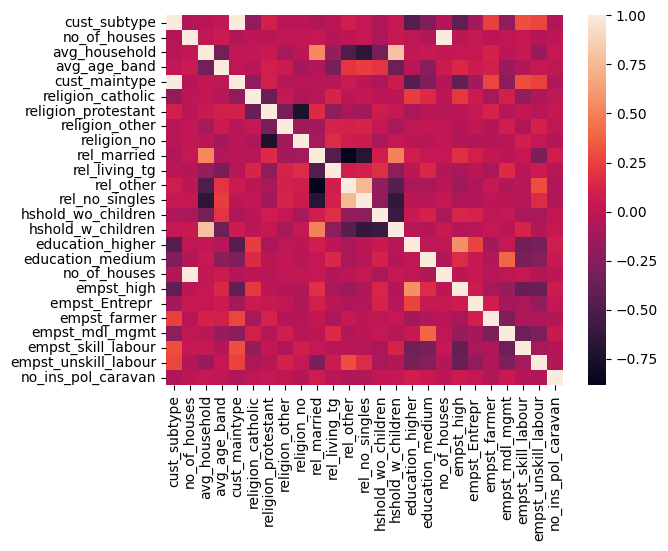

In [ ]:
import seaborn as sns

corr = df_3a.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
df_3b.corr()

socialclassA  socialclassB1  socialclassB2  socialclassC  \
socialclassA             1.000000      -0.059056      -0.095575     -0.558215   
socialclassB1           -0.059056       1.000000      -0.096444     -0.315250   
socialclassB2           -0.095575      -0.096444       1.000000     -0.399140   
socialclassC            -0.558215      -0.315250      -0.399140      1.000000   
socialclassD            -0.253059      -0.270442      -0.211048      0.016114   
rentedhouse             -0.323863      -0.071496      -0.161892      0.282294   
homeowners               0.324031       0.068711       0.163931     -0.282444   
car_1                    0.115722       0.095729       0.020575     -0.046600   
car_2                    0.171446      -0.048697       0.061530     -0.101843   
car_0                   -0.253158      -0.051956      -0.074097      0.124892   
health_ins_national     -0.583265      -0.139095      -0.084399      0.502846   
health_ins_private       0.583539       0.140026       0.084937     -0.503846   
income_l_30k            -0.294117      -0.135584      -0.050476      0.221666   
income_30k_45k          -0.268331       0.003159       0.016347      0.186839   
income_45k_75k           0.422998       0.110575       0.018223     -0.258265   
income_75k_122k          0.237168       0.098958       0.053168     -0.207262   
income_g_123k            0.247584       0.048671       0.050924     -0.207300   
income_avg               0.395435       0.138389       0.106567     -0.327725   
p_power_class            0.372232       0.174889       0.060015     -0.326691   
no_ins_pol_caravan       0.063498       0.028763       0.004040     -0.042309   

                     socialclassD  rentedhouse  homeowners     car_1  \
socialclassA            -0.253059    -0.323863    0.324031  0.115722   
socialclassB1           -0.270442    -0.071496    0.068711  0.095729   
socialclassB2           -0.211048    -0.161892    0.163931  0.020575   
socialclassC             0.016114     0.282294   -0.282444 -0.046600   
socialclassD             1.000000     0.295337   -0.296155 -0.230136   
rentedhouse              0.295337     1.000000   -0.999554 -0.187570   
homeowners              -0.296155    -0.999554    1.000000  0.189650   
car_1                   -0.230136    -0.187570    0.189650  1.000000   
car_2                   -0.138395    -0.255160    0.253923 -0.392514   
car_0                    0.376997     0.394749   -0.396140 -0.734564   
health_ins_national      0.262855     0.367149   -0.366491 -0.102886   
health_ins_private      -0.264381    -0.366224    0.366036  0.106548   
income_l_30k             0.314200     0.495892   -0.494652 -0.317715   
income_30k_45k           0.033670     0.012576   -0.011682  0.096317   
income_45k_75k          -0.283771    -0.350271    0.349876  0.223256   
income_75k_122k         -0.135368    -0.241349    0.239978  0.057267   
income_g_123k           -0.068702    -0.173462    0.172511 -0.082566   
income_avg              -0.319564    -0.425520    0.424762  0.226312   
p_power_class           -0.323309    -0.427518    0.427642  0.270167   
no_ins_pol_caravan      -0.063070    -0.079143    0.078429  0.069974   

                        car_2     car_0  health_ins_national  \
socialclassA         0.171446 -0.253158            -0.583265   
socialclassB1       -0.048697 -0.051956            -0.139095   
socialclassB2        0.061530 -0.074097            -0.084399   
socialclassC        -0.101843  0.124892             0.502846   
socialclassD        -0.138395  0.376997             0.262855   
rentedhouse         -0.255160  0.394749             0.367149   
homeowners           0.253923 -0.396140            -0.366491   
car_1               -0.392514 -0.734564            -0.102886   
car_2                1.000000 -0.276922            -0.231967   
car_0               -0.276922  1.000000             0.293693   
health_ins_national -0.231967  0.293693             1.000000   
health_ins_private   0.230793 -0.29644

<Axes: >

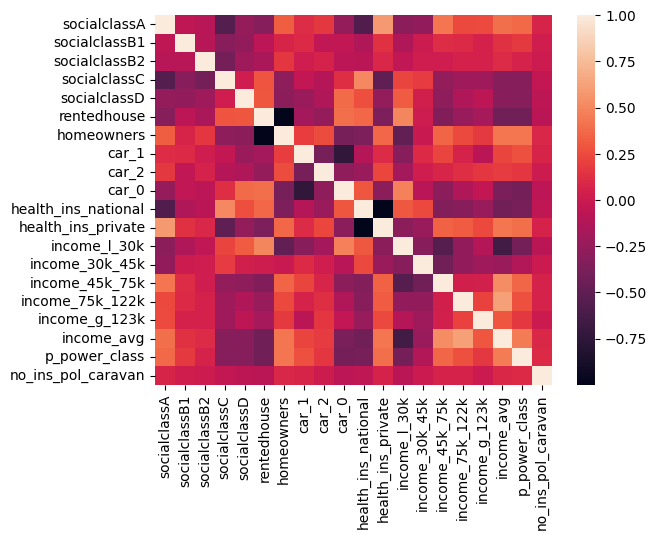

In [ ]:
corr = df_3b.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<Axes: >

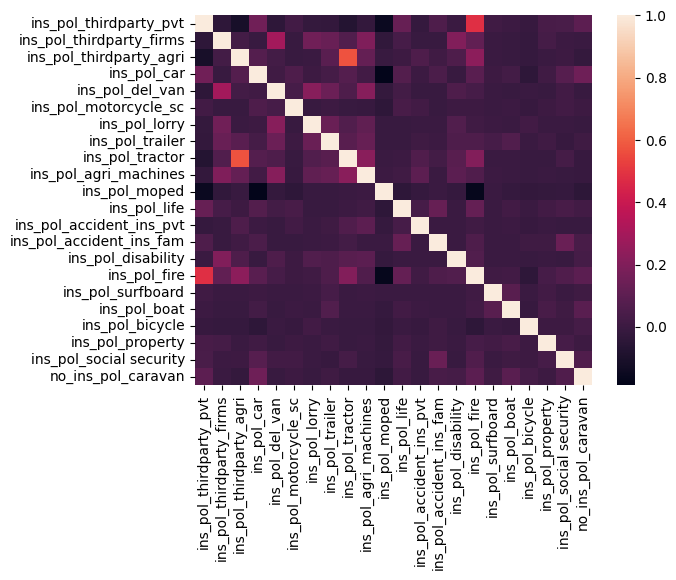

In [ ]:
corr = df_3c.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<Axes: >

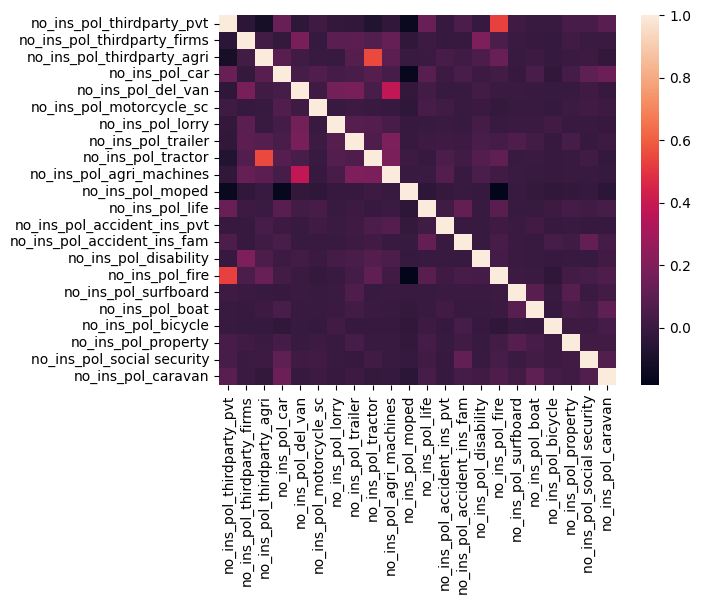

In [ ]:
corr = df_3d.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Bivariate relation

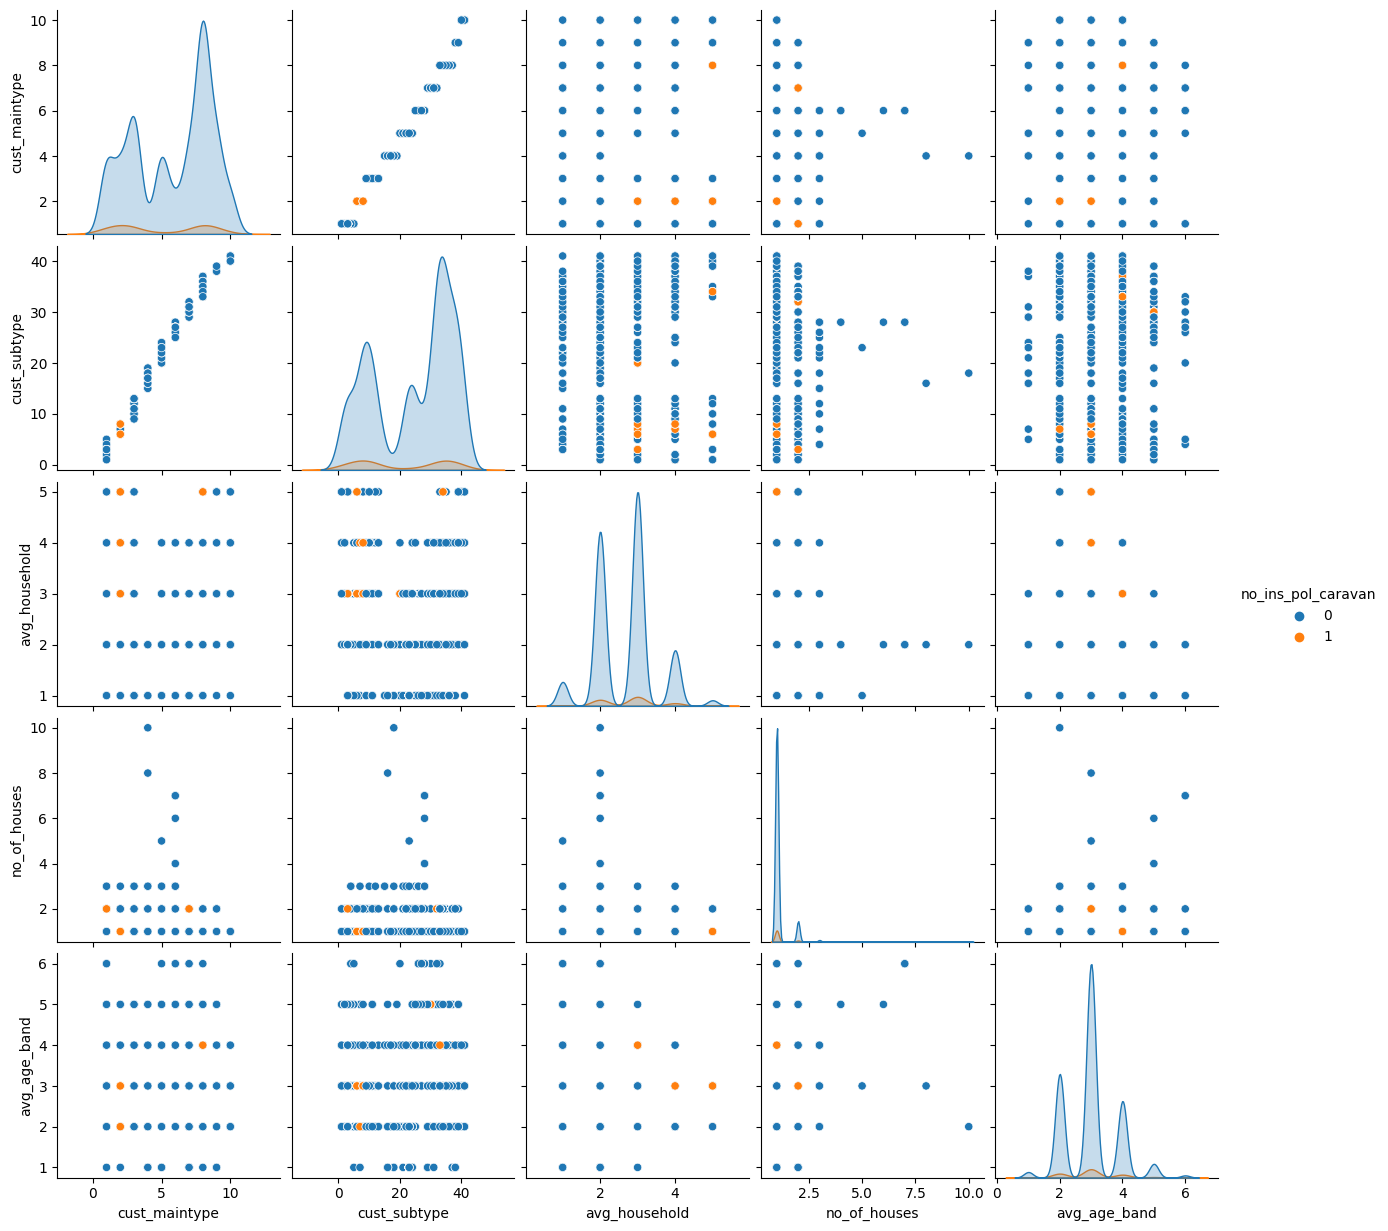

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
df_3s1=df_ori[["cust_maintype", "cust_subtype","avg_household","no_of_houses","avg_age_band","no_ins_pol_caravan"]]
sns.pairplot(df_3s1, hue="no_ins_pol_caravan")

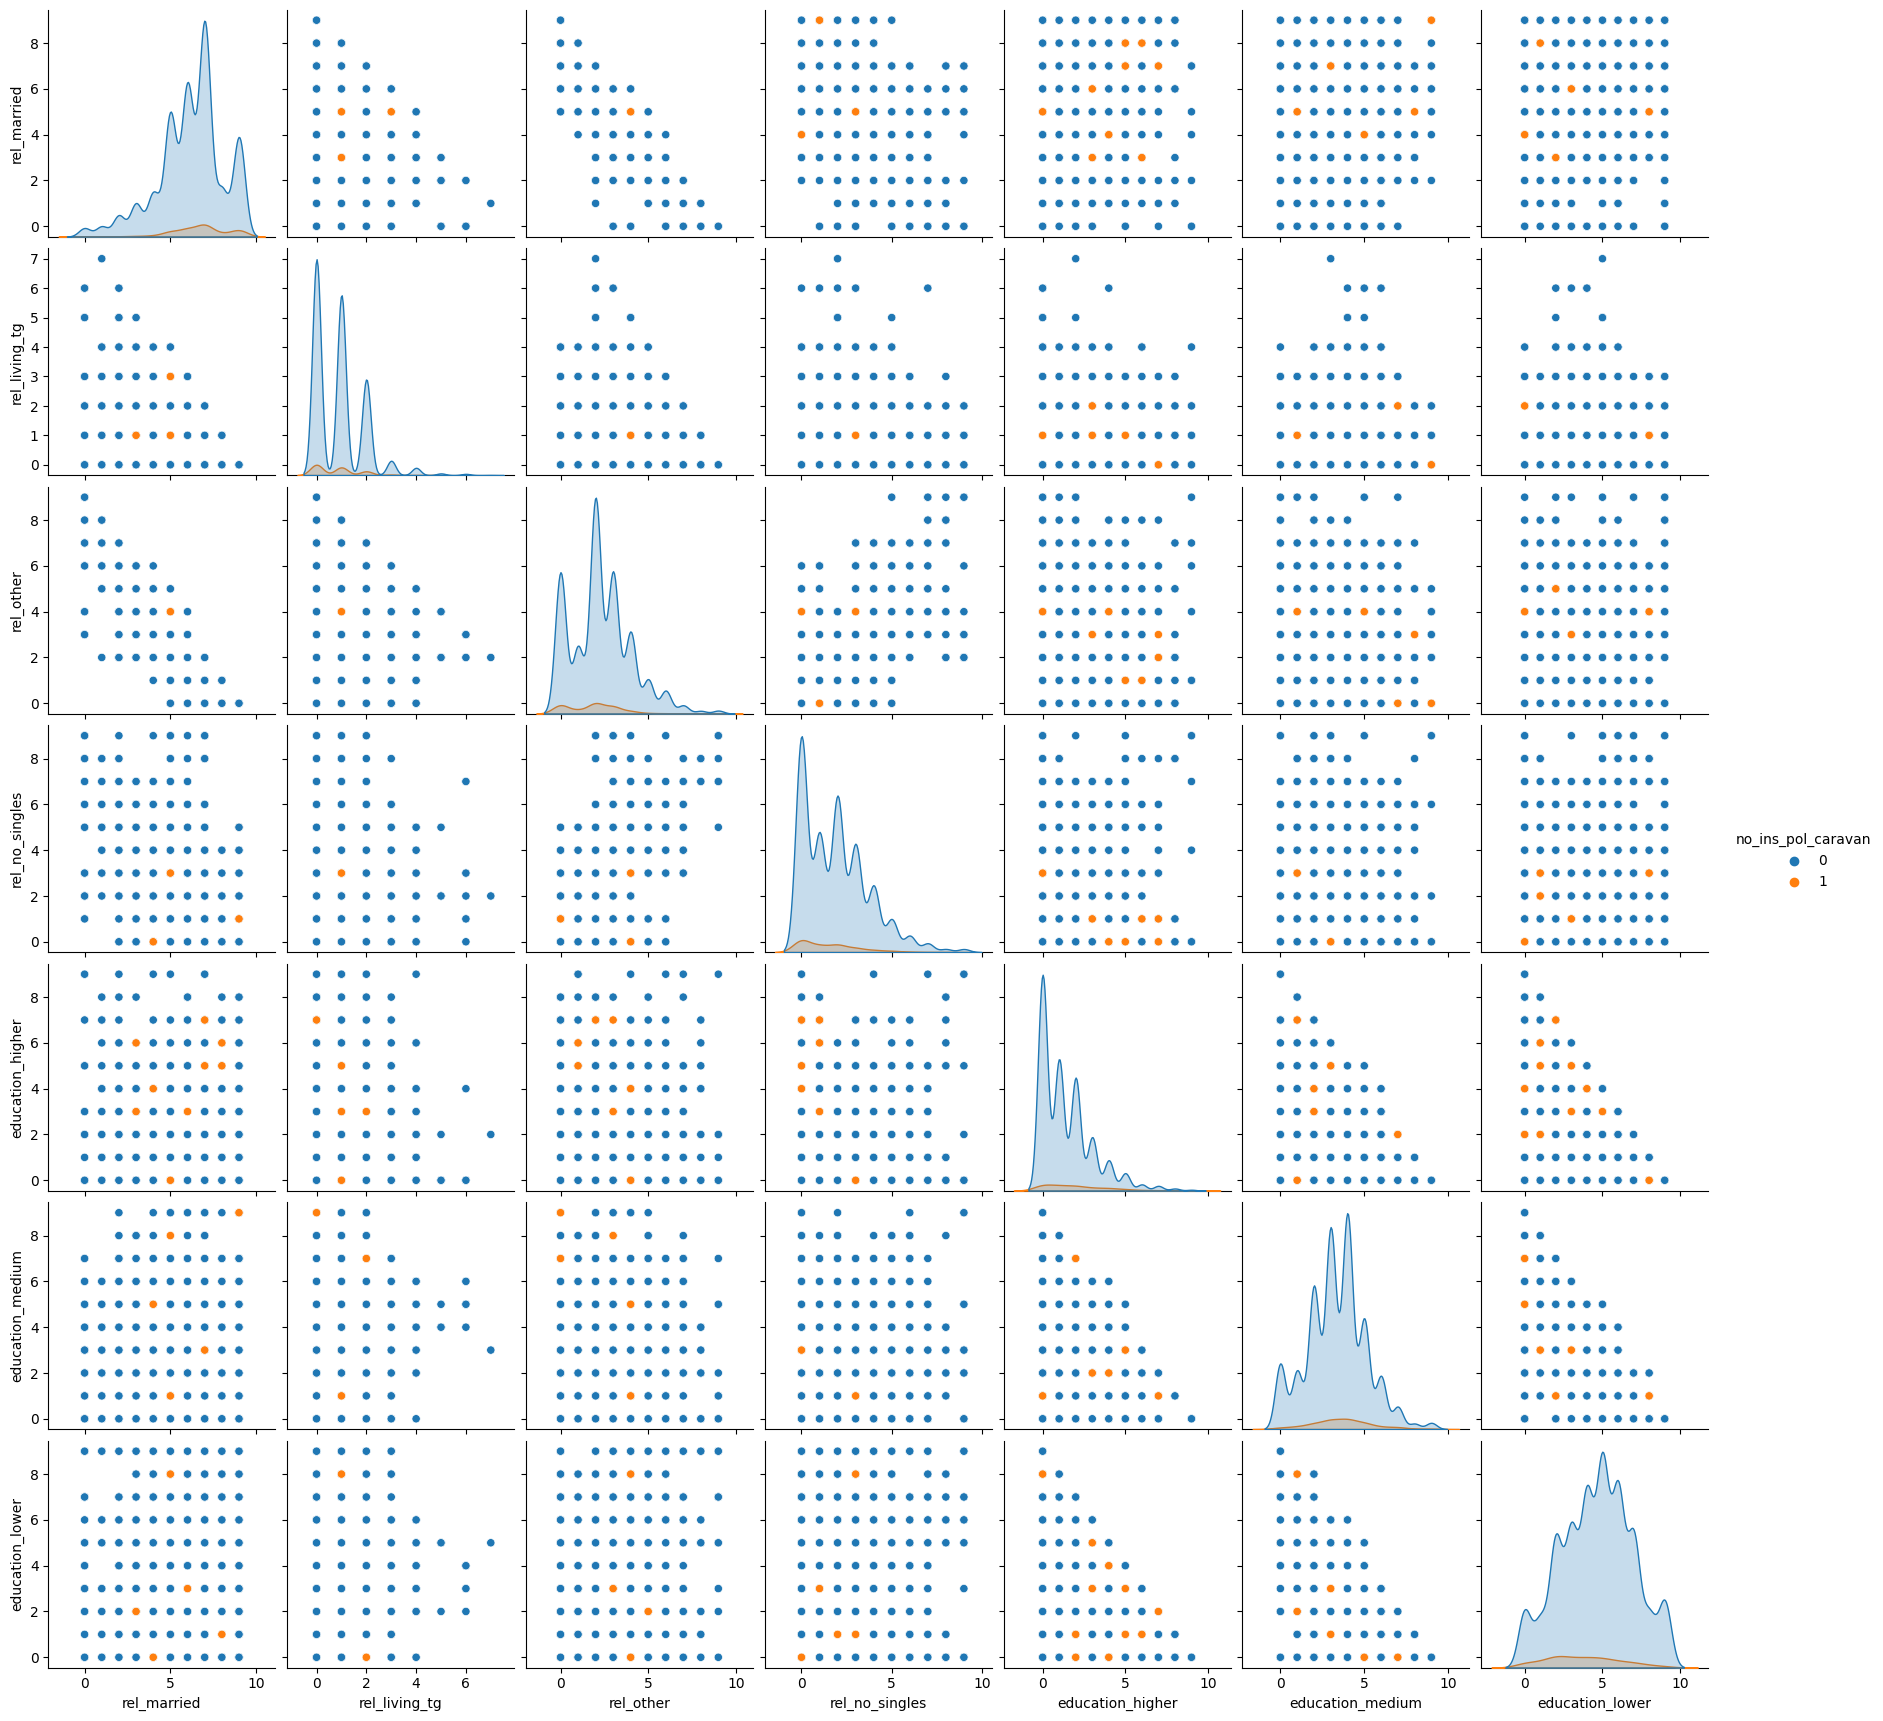

In [ ]:
df_3s2=df_ori[["rel_married" ,  "rel_living_tg" ,  "rel_other" ,  "rel_no_singles",  "education_higher",	"education_medium",	 "education_lower" , "no_ins_pol_caravan"]]
sns.pairplot(df_3s2, hue="no_ins_pol_caravan")

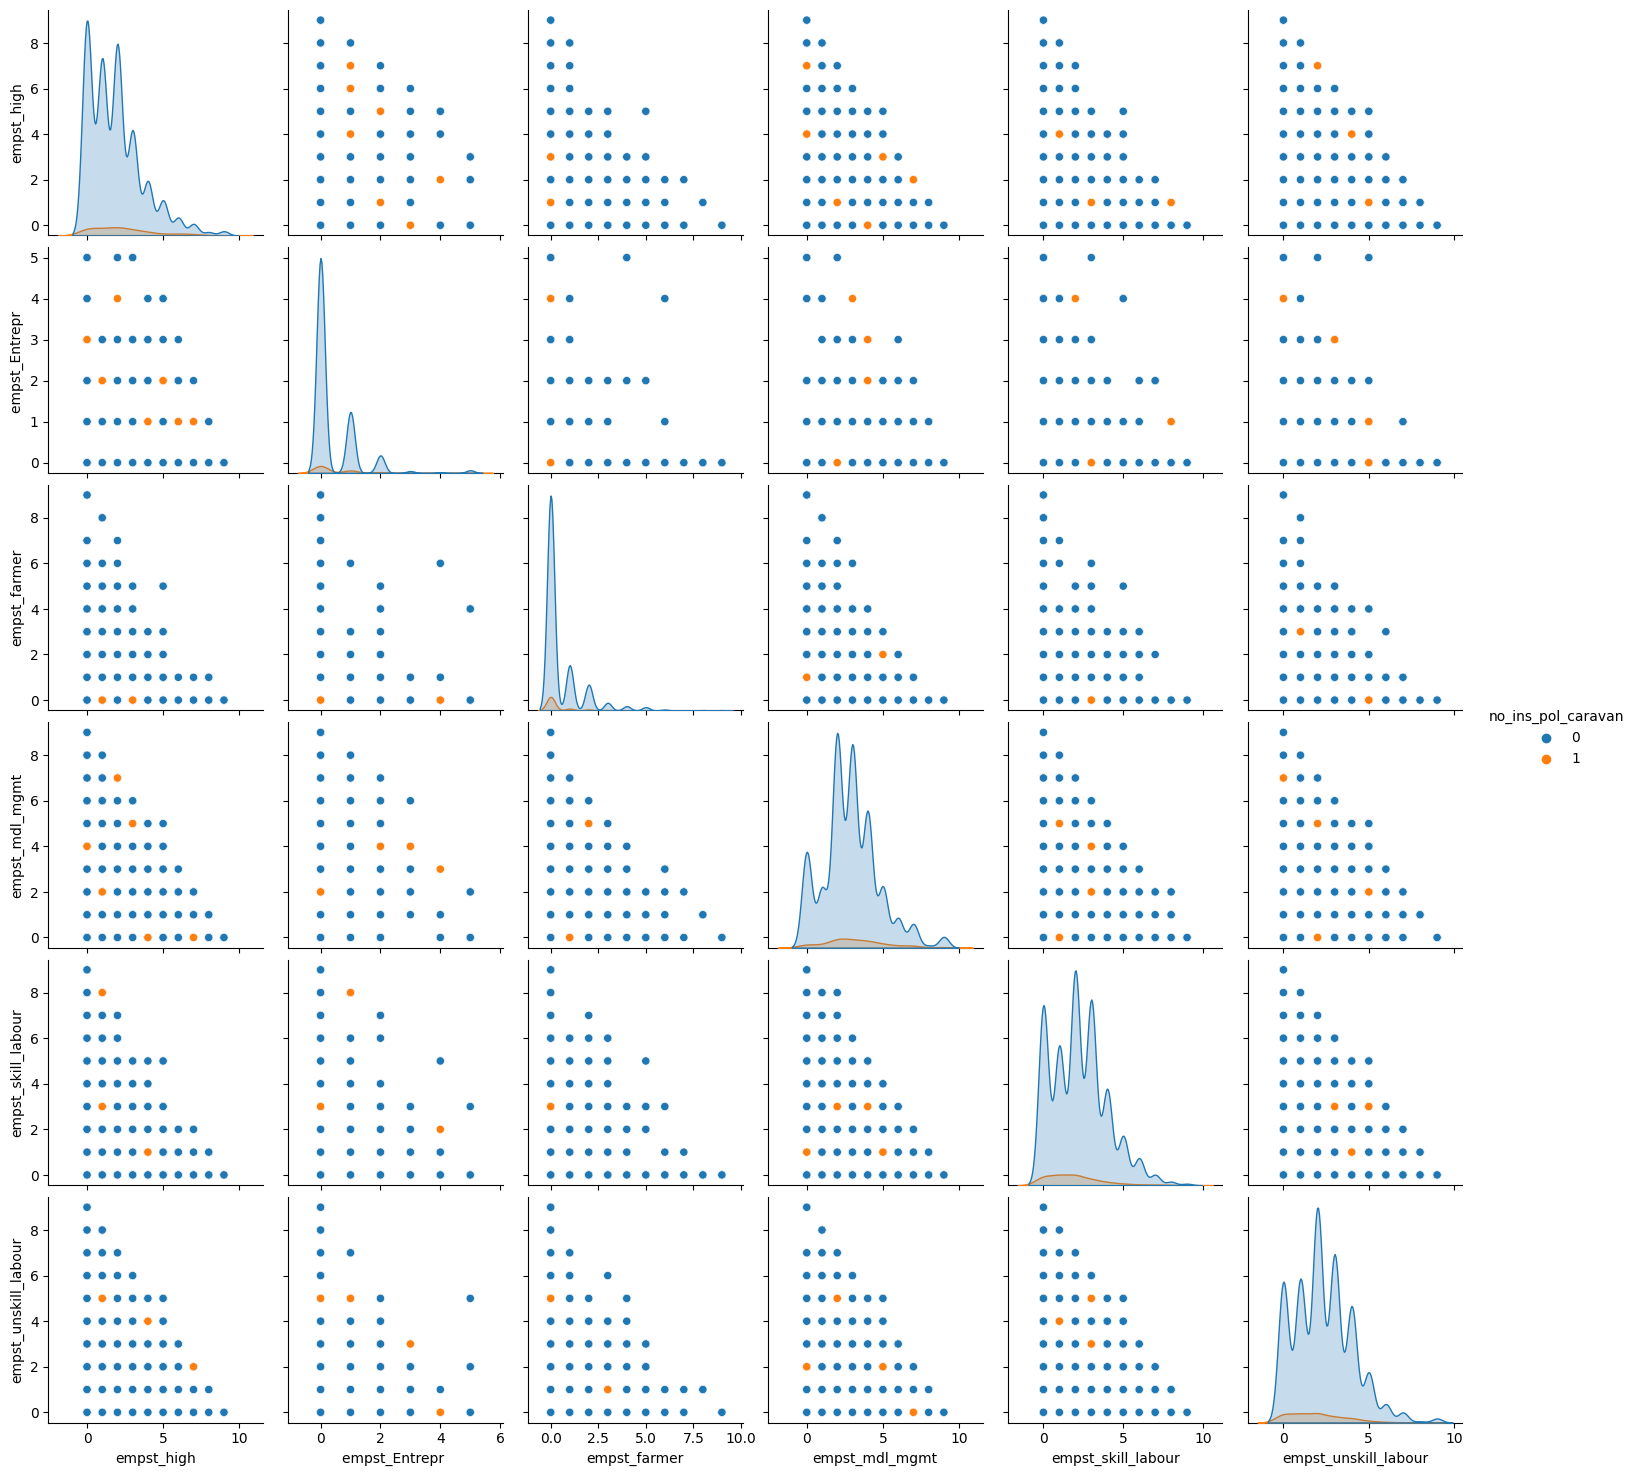

In [ ]:
 df_3s2=df_ori[["empst_high",	 "empst_Entrepr ", 	"empst_farmer", 	"empst_mdl_mgmt",	 "empst_skill_labour",	 "empst_unskill_labour", "no_ins_pol_caravan"]]
 sns.pairplot(df_3s2, hue="no_ins_pol_caravan")

In [ ]:

 df_3s2=df_ori[['p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_car',	'ins_pol_fire',	'ins_pol_boat',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_car',	'no_ins_pol_fire',	'no_ins_pol_boat','no_ins_pol_caravan']

